<a href="https://colab.research.google.com/github/ibonetc/IA_Optativa/blob/main/ML_Example_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de KNN con la base de datos Iris

Ahora descargue la base de datos de iris y súbala a los archivos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=9,stratify=Y)

In [5]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([40, 40, 40]))
(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([10, 10, 10]))


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [8]:
train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.9666666666666667
1.0


In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
y_pred = knn.predict(X_test)

In [11]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,10,0,10
Iris-virginica,0,0,10,10
All,10,10,10,30


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
y_train_pred=knn.predict(X)
print(classification_report(Y,y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [14]:
y_pred_proba=knn.predict_proba(X)
y_pred_proba

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [15]:
neighbors = np.arange(1,20)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

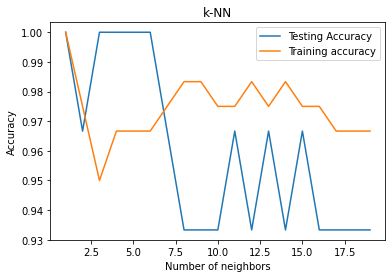

In [16]:
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [18]:
knn.score(X_train,y_train)

0.9833333333333333

In [19]:
knn.predict([[0.8, 1,0.6,3]])

array(['Iris-setosa'], dtype=object)

In [20]:
knn.predict_proba([[0.8, 1,0.6,3]])

array([[1., 0., 0.]])

Para probar parámetros como en el K-NN la K, se puede también utilizar la siguiente función

In [21]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [22]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
print(knn_cv.best_score_,knn_cv.best_params_)

0.9800000000000001 {'n_neighbors': 13}


## Validación Cruzada

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

scoring = ['precision_macro', 'recall_macro','f1_macro']
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
accuracy = cross_val_score(knn, X, Y, cv=10)
scores = cross_validate(knn, X,Y, scoring=scoring, cv=10)

In [25]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [26]:
print(accuracy.mean())
scores['test_recall_macro'].mean()

0.9733333333333334


0.9733333333333333

Para el resto de los clasificadores use:

MLP: from sklearn.neural_network import MLPClassifier
SVM: from sklearn import svm

In [27]:
from sklearn.neural_network import MLPClassifier
#Ejemplo de un MLP con dos capas con 5 y 2 neuronas respectivamente
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=10, random_state=1,max_iter=1000)


In [28]:
mlp.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=10, max_iter=1000, random_state=1,
              solver='lbfgs')

In [29]:
scoring = ['recall_macro']
score_mlp=cross_validate(mlp, X,Y, scoring=scoring, cv=10)
accuracy = cross_val_score(mlp, X, Y, cv=10)


In [30]:
print(score_mlp['test_recall_macro'].mean())
print(accuracy.mean())


0.9799999999999999
0.9800000000000001


In [31]:
param_grid = {'hidden_layer_sizes':np.arange(2,20)}
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=1,max_iter=1000)
mlp_cv= GridSearchCV(mlp,param_grid,cv=10)
mlp_cv.fit(X,Y)


GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1e-05, max_iter=1000, random_state=1,
                                     solver='lbfgs'),
             param_grid={'hidden_layer_sizes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [32]:
print(mlp_cv.best_score_,mlp_cv.best_params_)

0.9866666666666667 {'hidden_layer_sizes': 12}


In [33]:
from sklearn import svm
from sklearn.svm import SVR

In [34]:

#Diferentes kernels de SVM
svm=svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_lin = SVR(kernel='linear', C=100, gamma='auto')
svm_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)